## Text to Speech

In [141]:
import win32com.client as wincl
speak = wincl.Dispatch("SAPI.SpVoice")
speak.Speak("Hello Everyone! A warm welcome to Sushikshaa Coding league! We hope you are very excited to learn new things!")

1

## Timer

In [130]:
import winsound,time
a= 3
speak.Speak("In How many seconds you want me to alert you?")
b= int(input())

time.sleep(b)

for i in range(a):
    winsound.Beep(2500,100)
    winsound.Beep(2000,100)
    winsound.Beep(2500,100)
    speak.Speak('Times Up!')
    
speak.Speak('Stop!')

2


1

## Control Keyboard and Mouse
Pre-requisites to be installed: pyautogui 
- Just run pip install pyautogui

In [105]:
import pyautogui
import time

### Move Mouse Pointer

In [124]:
for i in range(3):
    pyautogui.move(600, 0, duration=0.25)   # right
    pyautogui.move(0, 200, duration=0.25)   # down
    pyautogui.move(-600, 0, duration=0.25)  # left
    pyautogui.move(0, -200, duration=0.25)  # up

### Screenshot

In [107]:
im = pyautogui.screenshot()

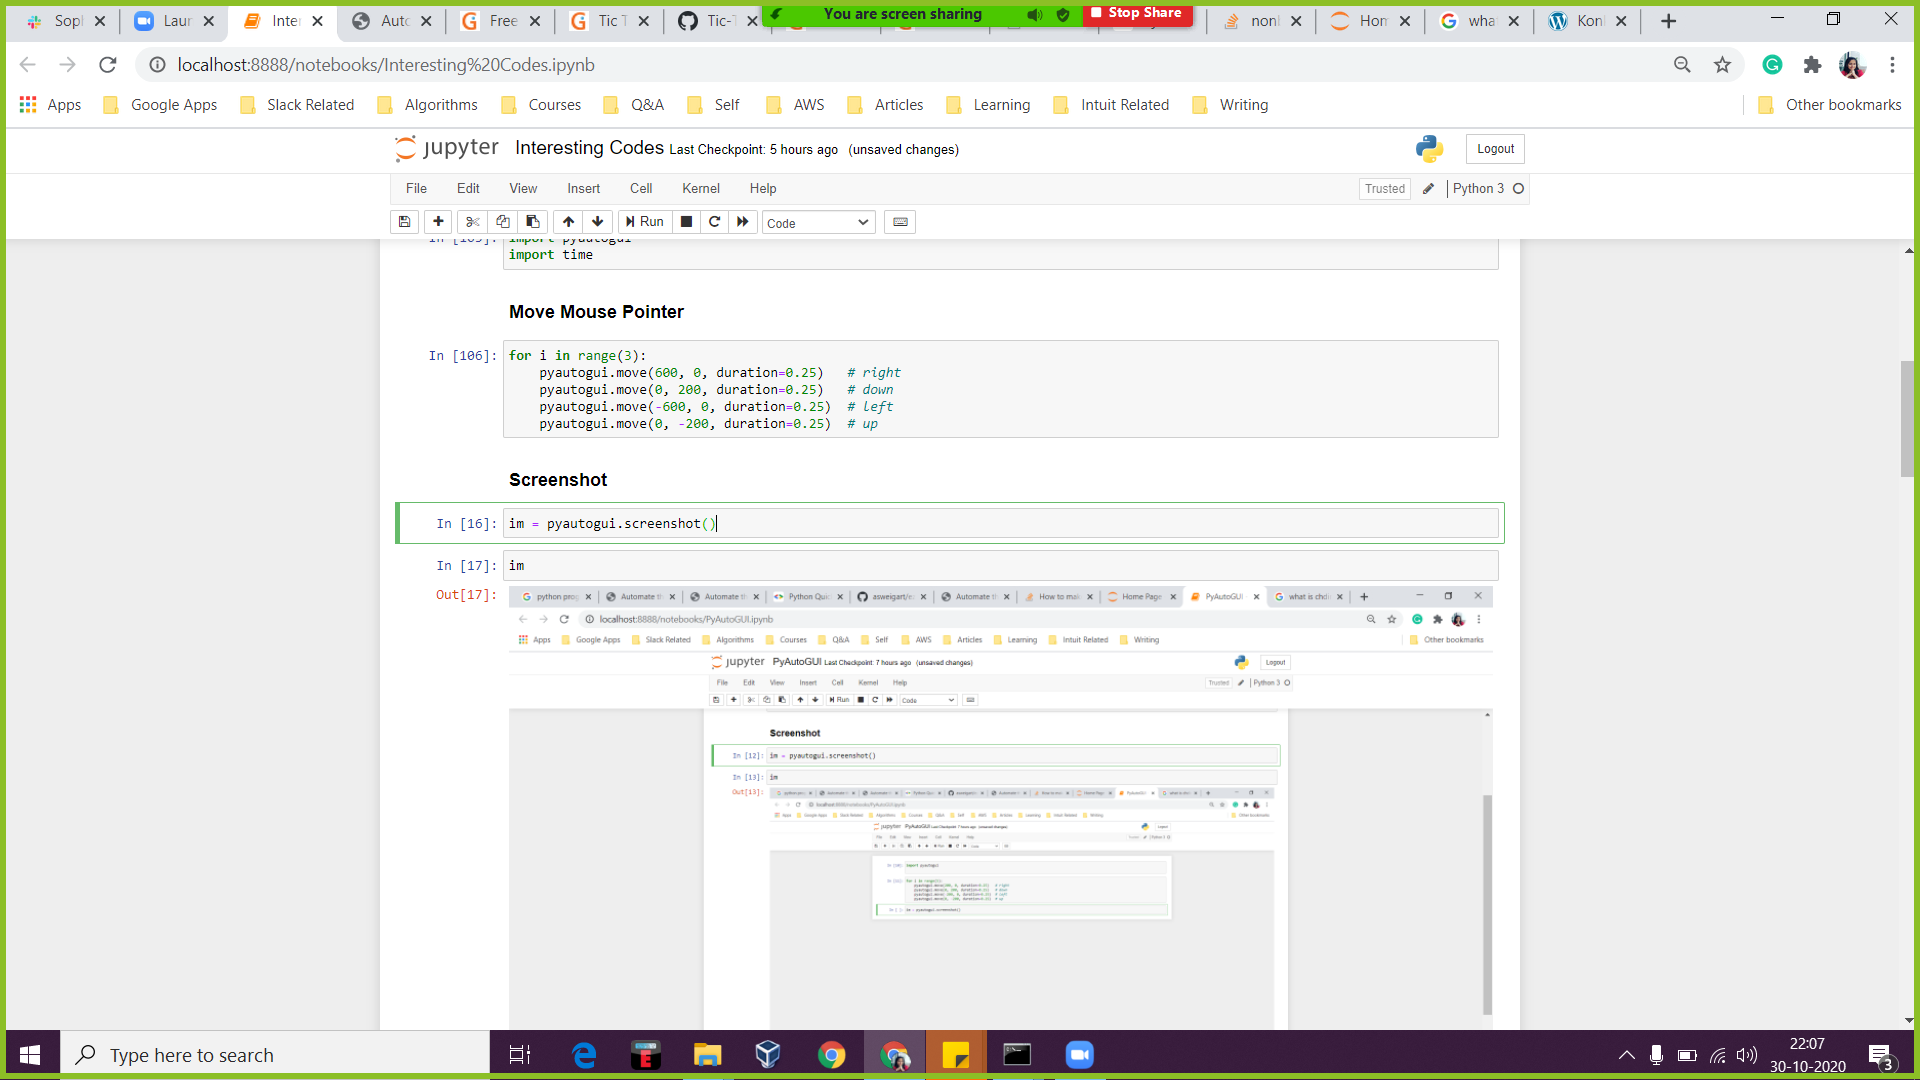

In [108]:
im

### Notepad Magic

In [21]:
pyautogui.mouseInfo()

In [125]:
pyautogui.click(147, 1057) 
time.sleep(1)
pyautogui.write('Notepad')
time.sleep(1)
pyautogui.press('enter')
time.sleep(1)
pyautogui.write('World Konkani Centre is founded by Konkani Bhas Ani Sanskriti Prathistan')
pyautogui.press('enter')
time.sleep(0.5)
pyautogui.write('to serve as a centre for the preservation and overall development of Konkani language, art and culture involving all the Konkani people the world over.')
pyautogui.press('enter')
time.sleep(0.5)
pyautogui.write('Thank You!!')

#Save the file
time.sleep(1)
pyautogui.hotkey('ctrl', 's')

time.sleep(0.5)
pyautogui.write('magicfile.txt')
time.sleep(0.25)
pyautogui.press('enter')

### References

- https://pythonprogramminglanguage.com/text-to-speech/
- https://automatetheboringstuff.com/2e/chapter20/

##############################################################################################################################

# Games

- Pre-requisites to be installed: 
    - numpy
    - freegames

## Tic Tac Toe
Source: https://github.com/aqeelanwar/Tic-Tac-Toe


In [126]:
from tkinter import *
import numpy as np

size_of_board = 900
symbol_size = (size_of_board / 3 - size_of_board / 8) / 2
symbol_thickness = 60
X_color = '#28a745'
O_color = '#E62272'
Green_color = '#556b2f'
draw_color = '#5c3648'

class TicTacToe():
    # ------------------------------------------------------------------
    # Initialization Functions:
    # ------------------------------------------------------------------
    def __init__(self):
        self.window = Tk()
        self.window.title('Tic Tac Toe')
        self.canvas = Canvas(self.window, width=size_of_board, height=size_of_board)
        self.canvas.pack()
        # Input from user in form of clicks
        self.window.bind('<Button-1>', self.click)

        self.initialize_game_board()
        self.player_X_turns = True
        self.board_status = np.zeros(shape=(3, 3))

        self.player_X_starts = True
        self.reset_board = False
        self.gameover = False
        self.tie = False
        self.X_wins = False
        self.O_wins = False

        self.X_score = 0
        self.O_score = 0
        self.tie_score = 0

    def mainloop(self):
        self.window.mainloop()
    
    """
        Initialise game board with cells to play
    """
    def initialize_game_board(self):
        for i in range(2):
            self.canvas.create_line((i + 1) * size_of_board / 3, 0, (i + 1) * size_of_board / 3, size_of_board)

        for i in range(2):
            self.canvas.create_line(0, (i + 1) * size_of_board / 3, size_of_board, (i + 1) * size_of_board / 3)
    
    """
        Restart the game
    """
    def play_again(self):
        self.initialize_game_board()
        self.player_X_starts = not self.player_X_starts
        self.player_X_turns = self.player_X_starts
        self.board_status = np.zeros(shape=(3, 3))
    
    """
        Drawing Functions:
        The modules required to draw required game based object on canvas
        logical_position = grid value on the board
        grid_position = actual pixel values of the center of the grid
    """
    def draw_O(self, logical_position):
        logical_position = np.array(logical_position)
        
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_oval(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                outline=O_color)

    def draw_X(self, logical_position):
        grid_position = self.convert_logical_to_grid_position(logical_position)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] - symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] + symbol_size, width=symbol_thickness,
                                fill=X_color)
        self.canvas.create_line(grid_position[0] - symbol_size, grid_position[1] + symbol_size,
                                grid_position[0] + symbol_size, grid_position[1] - symbol_size, width=symbol_thickness,
                                fill=X_color)

    """
    To display game result dashboard
    """
    def gameover_dashboard(self):

        if self.X_wins:
            self.X_score += 1
            text = 'Player with X wins!'
            color = X_color
        elif self.O_wins:
            self.O_score += 1
            text = 'Player with O wins!'
            color = O_color
        else:
            self.tie_score += 1
            text = 'Too bad..., its a draw!'
            color = draw_color

        self.canvas.delete("all")
        self.canvas.create_text(size_of_board / 2, size_of_board / 3, font="cmr 20 bold", fill=color, text=text)

        score_text = 'Scores Board \n'
        self.canvas.create_text(size_of_board / 2, 5 * size_of_board / 8, font="cmr 10 bold", fill=Green_color,
                                text=score_text)

        score_text = 'Player with X : ' + str(self.X_score) + '\n'
        score_text += 'Player with O : ' + str(self.O_score) + '\n'
        score_text += 'Tie : ' + str(self.tie_score)
        self.canvas.create_text(size_of_board / 2, 3 * size_of_board / 4, font="cmr 15 bold", fill=Green_color,
                                text=score_text)
        self.reset_board = True

        score_text = 'Click here to play again! \n'
        self.canvas.create_text(size_of_board / 2, 15 * size_of_board / 16, font="cmr 10 bold", fill= draw_color,
                                text=score_text)

    """
        Function Logic
        to map pixels correctly.
    """
    def convert_logical_to_grid_position(self, logical_position):
        logical_position = np.array(logical_position, dtype=int)
        return (size_of_board / 3) * logical_position + size_of_board / 6

    def convert_grid_to_logical_position(self, grid_position):
        grid_position = np.array(grid_position)
        return np.array(grid_position // (size_of_board / 3), dtype=int)

    """
        To check if a grid is occupied
    """
    def check_if_grid_occupied(self, logical_position):
        if self.board_status[logical_position[0]][logical_position[1]] == 0:
            return False
        else:
            return True
    """
        Check if a player is winner
    """
    def is_player_winner(self, player):
        player = -1 if player == 'X' else 1

        # Three in a row
        for i in range(3):
            if self.board_status[i][0] == self.board_status[i][1] == self.board_status[i][2] == player:
                return True
            if self.board_status[0][i] == self.board_status[1][i] == self.board_status[2][i] == player:
                return True

        # Diagonals
        if self.board_status[0][0] == self.board_status[1][1] == self.board_status[2][2] == player:
            return True

        if self.board_status[0][2] == self.board_status[1][1] == self.board_status[2][0] == player:
            return True

        return False

    """
        Check if a game is draw
    """
    def is_draw(self):
        r, c = np.where(self.board_status == 0)
        tie = False
        if len(r) == 0:
            tie = True

        return tie
    
    """
        Check if game is over
    """
    def is_gameover(self):
        # Either someone wins or all grid occupied
        self.X_wins = self.is_player_winner('X')
        if not self.X_wins:
            self.O_wins = self.is_player_winner('O')

        if not self.O_wins:
            self.tie = self.is_draw()

        gameover = self.X_wins or self.O_wins or self.tie

        return gameover

    """
        On click on cell, draw X or Y depending on the player's turn and simultaneously check if the game is over or not
    """
    def click(self, event):
        grid_position = [event.x, event.y]
        logical_position = self.convert_grid_to_logical_position(grid_position)

        if not self.reset_board:
            if self.player_X_turns:
                if not self.check_if_grid_occupied(logical_position):
                    self.draw_X(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = -1
                    self.player_X_turns = not self.player_X_turns
            else:
                if not self.check_if_grid_occupied(logical_position):
                    self.draw_O(logical_position)
                    self.board_status[logical_position[0]][logical_position[1]] = 1
                    self.player_X_turns = not self.player_X_turns

            # Check if game is concluded
            if self.is_gameover():
                self.gameover_dashboard()
        else:  # Play Again
            self.canvas.delete("all")
            self.play_again()
            self.reset_board = False


game = TicTacToe()
game.mainloop()

## Snake
Source: http://www.grantjenks.com/docs/freegames/snake.html

In [128]:
"""Snake, classic arcade game.

Exercises

1. How do you make the snake faster or slower?
2. How can you make the snake go around the edges?
3. How would you move the food?
4. Change the snake to respond to arrow keys.

"""

from turtle import *
from random import randrange
from freegames import square, vector

food = vector(0, 0)
snake = [vector(10, 0)]
aim = vector(0, -10)

def change(x, y):
    "Change snake direction."
    aim.x = x
    aim.y = y

def inside(head):
    "Return True if head inside boundaries."
    return -200 < head.x < 190 and -200 < head.y < 190

def move():
    "Move snake forward one segment."
    head = snake[-1].copy()
    head.move(aim)

    if not inside(head) or head in snake:
        square(head.x, head.y, 9, 'red')
        update()
        return

    snake.append(head)

    if head == food:
        print('Snake:', len(snake))
        food.x = randrange(-15, 15) * 10
        food.y = randrange(-15, 15) * 10
    else:
        snake.pop(0)

    clear()

    for body in snake:
        square(body.x, body.y, 9, 'black')

    square(food.x, food.y, 9, 'green')
    update()
    ontimer(move, 100)

setup(420, 420, 370, 0)
hideturtle()
tracer(False)
listen()
onkey(lambda: change(10, 0), 'Right')
onkey(lambda: change(-10, 0), 'Left')
onkey(lambda: change(0, 10), 'Up')
onkey(lambda: change(0, -10), 'Down')
move()
done()

Snake: 2
Snake: 3
Snake: 4
Snake: 5
Snake: 6
Snake: 7
Snake: 8
